<a href="https://colab.research.google.com/github/mspatke/Binary-Classification-using-ANN/blob/main/Customer_Churn_Prediction_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns


In [ ]:
df= pd.read_csv("Churn_Modelling.csv")

In [ ]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


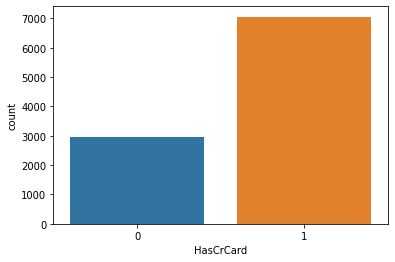

In [ ]:
sns.countplot(df.HasCrCard)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


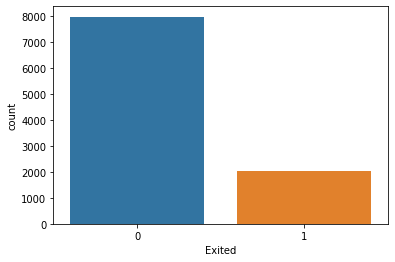

In [ ]:
sns.countplot(df.Exited)

In [ ]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace = True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df =pd.get_dummies(df, columns=['Geography','Gender'],drop_first=True)

df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [ ]:
x = df.drop(columns= ['Exited'])
y=df['Exited']


from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.fit_transform(x_test)

In [ ]:
x_train_scaled.shape

(8000, 11)

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(3, activation='sigmoid',input_dim =11)) # change activation function to relu and change hidden nodes or hidden layers
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 3)                 36        
                                                                 
 dense_6 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer='Adam')

In [ ]:
model.fit(x_train_scaled, y_train, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 3ms/step - loss: 1.2657
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.9273
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.7318
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.6236
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5641
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5313
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5128
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5017
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4941
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4879
Epoch 11/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4821
Epoch 12/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4762
Epoch 13/100


In [ ]:
model.layers[0].get_weights()

[array([[-0.00797893, -0.05455675, -0.07572207],
        [ 4.3378096 , -0.12235497,  0.08548673],
        [ 0.11655872, -0.17209828, -0.02215402],
        [ 0.56103545, -0.9984812 ,  0.73729837],
        [ 0.4643256 , -3.8308606 ,  1.9231743 ],
        [ 0.07832304, -0.07676259, -0.06015174],
        [ 0.42332208, -1.1128423 , -0.6045188 ],
        [-0.0195047 ,  0.10476443,  0.03323629],
        [-0.11581516,  1.0745984 , -0.11462092],
        [-0.17484094,  0.04769508,  0.23183267],
        [-0.2544536 , -0.25575835, -0.25602755]], dtype=float32),
 array([-1.102495, -2.591416, -3.147513], dtype=float32)]

In [ ]:
model.layers[1].get_weights()

[array([[2.2603836],
        [3.1403594],
        [3.9879518]], dtype=float32), array([-3.9953632], dtype=float32)]

In [ ]:
y_log = model.predict(x_test_scaled)

In [ ]:
y_log = model.predict(x_test_scaled)
y_pred=np.where(y_log>0.5,1,0)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.857

In [ ]:
model2 = Sequential()

model2.add(Dense(11, activation='relu',input_dim =11)) # change activation function to relu and change hidden nodes or hidden layers

model2.add(Dense(11, activation='relu')) 

model2.add(Dense(1, activation='sigmoid'))

In [ ]:
model2.compile(loss = 'binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
history = model2.fit(x_train_scaled, y_train , epochs =100, validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 4ms/step - loss: 0.5464 - accuracy: 0.7773 - val_loss: 0.4815 - val_accuracy: 0.7956
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4568 - accuracy: 0.8025 - val_loss: 0.4426 - val_accuracy: 0.8069
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4312 - accuracy: 0.8109 - val_loss: 0.4296 - val_accuracy: 0.8131
Epoch 4/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4170 - accuracy: 0.8208 - val_loss: 0.4137 - val_accuracy: 0.8313
Epoch 5/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4021 - accuracy: 0.8331 - val_loss: 0.4022 - val_accuracy: 0.8319
Epoch 6/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3872 - accuracy: 0.8425 - val_loss: 0.3822 - val_accuracy: 0.8425
Epoch 7/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3741 - accuracy: 0.8477 - val_loss: 0.3704 - val_accuracy: 0.8481

In [ ]:
y_log = model2.predict(x_test_scaled)

y_pred=np.where(y_log>0.5,1,0)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.869

In [ ]:
import matplotlib.pyplot as plt

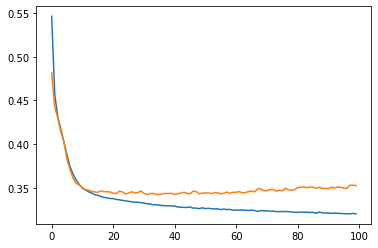

In [ ]:
plt.plot(history.history['loss'],label="loss")
plt.plot(history.history['val_loss'],label="val_loss")

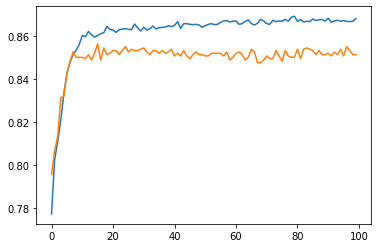

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])